In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [68]:
df=pd.read_csv('ElectionData.csv')
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


#  Field Attributes

    1.TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition
    2.time (timestamp): Date and time of the data acquisition
    3.territoryName (string): Short name of the location (district or nation-wide)
    4.totalMandates (numeric): MP's elected at the moment
    5.availableMandates (numeric): MP's left to elect at the moment
    6.numParishes (numeric): Total number of parishes in this location
    7.numParishesApproved (numeric): Number of parishes approved in this location
    8.blankVotes (numeric): Number of blank votes
    9.blankVotesPercentage (numeric): Percentage of blank votes
    10.nullVotes (numeric): Number of null votes
    11.nullVotesPercentage (numeric): Percentage of null votes
    12.votersPercentage (numeric): Percentage of voters
    13.subscribedVoters (numeric): Number of subscribed voters in the location
    14.totalVoters (numeric): Percentage of blank votes
    15.pre.blankVotes (numeric): Number of blank votes (previous election)
    16.pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election)
    17.pre.nullVotes (numeric): Number of null votes (previous election)
    18.pre.nullVotesPercentage (numeric): Percentage of null votes (previous election)
    19.pre.votersPercentage (numeric): Percentage of voters (previous election)
    20.pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election)
    21.pre.totalVoters (numeric): Percentage of blank votes (previous election)
    22.Party (string): Political Party
    23.Mandates (numeric): MP's elected at the moment for the party in a given district
    24.Percentage (numeric): Percentage of votes in a party
    25.validVotesPercentage (numeric): Percentage of valid votes in a party
    26.Votes (numeric): Percentage of party votes
    27.Hondt (numeric): Number of MP's according to the distribution of votes now
    28.FinalMandates (numeric): Target: final number of elected MP's in a district/national-level.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [70]:
df.shape

(21643, 28)

# Observations:

    1. Except columns time, territoryName & Party others are of numeric type, which needs to be converted 

In [71]:
# Replace '-' with no value to make it applicable for conversion
# Change the Date column to numeric

df['time'].replace(to_replace='[- :]', value='', regex=True, inplace=True)
df['time'] = pd.to_numeric(df['time'])
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,20191006201002,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,20191006201002,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,20191006201002,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,20191006201002,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,20191006201002,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [72]:
df.territoryName.value_counts()

Braga                  1134
Leiria                 1134
Porto                  1134
Território Nacional    1134
Coimbra                1080
Viana do Castelo       1080
Lisboa                 1080
Setúbal                1080
Viseu                  1080
Madeira                1080
Aveiro                 1080
Guarda                 1026
Évora                  1026
Faro                   1026
Santarém               1026
Bragança                972
Castelo Branco          972
Portalegre              918
Beja                    918
Vila Real               864
Açores                  799
Name: territoryName, dtype: int64

In [73]:
df.Party.value_counts()

PCP-PEV      1127
PPD/PSD      1127
IL           1127
CH           1127
A            1127
PS           1127
L            1127
CDS-PP       1127
PDR          1127
PNR          1127
PCTP/MRPP    1127
PAN          1127
B.E.         1127
PPM          1073
R.I.R.       1026
MPT          1019
PTP          1019
PURP          972
NC            972
JPP           486
MAS           425
Name: Party, dtype: int64

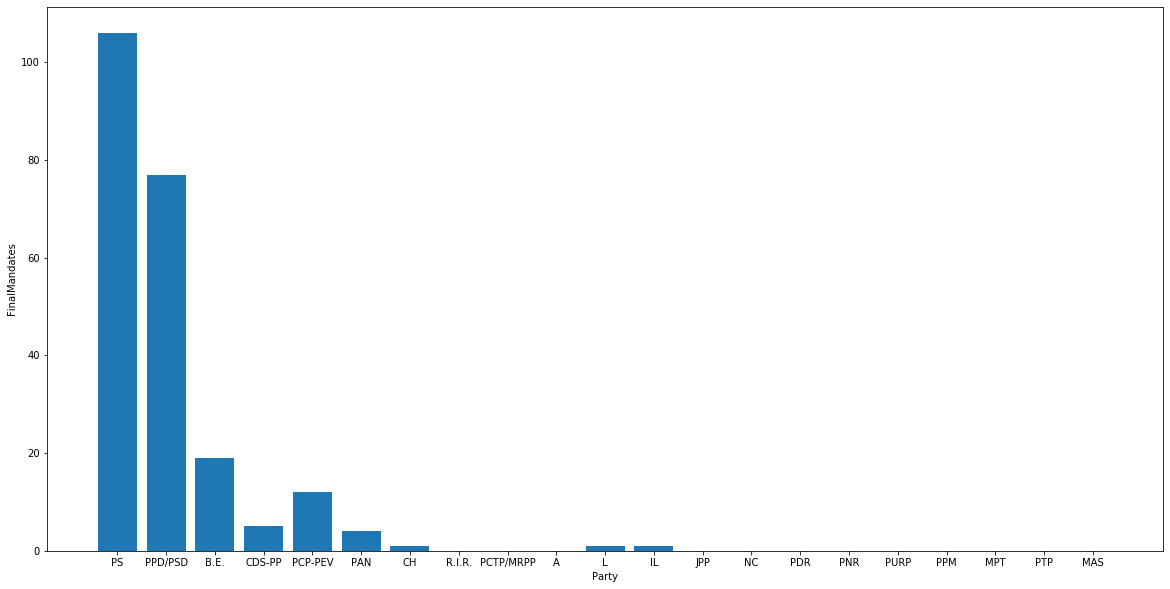

In [74]:
# Checking the FinalMandates w.r.t. Party

plt.figure(figsize=(20,10))
#plt.bar(df['Total Deaths'],df['Country'])
plt.bar(df['Party'],df['FinalMandates'])

plt.xlabel('Party')
plt.ylabel('FinalMandates')
plt.show()

In [75]:
# Encoding columns as part of transformation.

from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

df['territoryName'] = le.fit_transform(df['territoryName'])
df['Party'] = le.fit_transform(df['Party'])

df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,20191006201002,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,17,0,38.29,40.22,147993,94,106
1,0,20191006201002,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,15,0,33.28,34.95,128624,81,77
2,0,20191006201002,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,1,0,6.81,7.15,26307,16,19
3,0,20191006201002,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,2,0,4.90,5.14,18923,12,5
4,0,20191006201002,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,11,0,4.59,4.83,17757,11,12


In [76]:
# Checking which all columns have null values
df.isnull().sum().sort_values(ascending=False)

FinalMandates               0
Hondt                       0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
TimeElapsed                 0
dtype: int64

In [77]:
# Checking the zscore in order to normalize the data.
from scipy.stats import zscore
z= np.abs(zscore(df))
z

array([[ 1.71470808,  0.48122944,  0.98296816, ...,  1.4192844 ,
        14.75732693, 15.25996213],
       [ 1.71470808,  0.48122944,  0.98296816, ...,  1.211248  ,
        12.69167309, 11.04023671],
       [ 1.71470808,  0.48122944,  0.98296816, ...,  0.11229293,
         2.36340389,  2.60078588],
       ...,
       [ 1.69806785,  2.39492235,  1.48421407, ...,  0.16751275,
         0.17893929,  0.1638618 ],
       [ 1.69806785,  2.39492235,  1.48421407, ...,  0.16769534,
         0.17893929,  0.1638618 ],
       [ 1.69806785,  2.39492235,  1.48421407, ...,  0.16899497,
         0.17893929,  0.1638618 ]])

In [78]:
# Removing the outliers having zscore value of more than 3.
election_data=df[(z<3).all(axis=1)]
election_data.shape

(18333, 28)

In [79]:
election_data.skew()

TimeElapsed                -0.024110
time                        1.944518
territoryName               0.034073
totalMandates               2.542453
availableMandates           2.593527
numParishes                 0.585363
numParishesApproved         0.619329
blankVotes                  1.800122
blankVotesPercentage       -0.844508
nullVotes                   2.103352
nullVotesPercentage         0.564426
votersPercentage           -0.392023
subscribedVoters            2.407541
totalVoters                 2.468630
pre.blankVotes              2.034860
pre.blankVotesPercentage   -0.410446
pre.nullVotes               2.340000
pre.nullVotesPercentage     1.033803
pre.votersPercentage       -0.514215
pre.subscribedVoters        2.370988
pre.totalVoters             2.468950
Party                       0.009657
Mandates                    7.177093
Percentage                  3.373567
validVotesPercentage        3.383145
Votes                       7.310058
Hondt                       7.012845
F

Columns 'time','totalMandates','availableMandates','blankVotes','nullVotes','subscribedVoters','totalVoters','pre.blankVotes','pre.nullVotes','pre.nullVotesPercentage','pre.subscribedVoters','pre.totalVoters','Mandates','Percentage','validVotesPercentage','Votes','Hondt','FinalMandates' 
has skewed data.



In [80]:
col=['time','totalMandates','availableMandates','blankVotes','nullVotes','subscribedVoters','totalVoters','pre.blankVotes','pre.nullVotes','pre.nullVotesPercentage','pre.subscribedVoters','pre.totalVoters','Mandates','Percentage','validVotesPercentage','Votes','Hondt','FinalMandates']
len(col)

18

In [81]:
# Reducing the skewness with boxcox1p in order to avoid 0 encountered as negative while transformation.

from scipy.special import boxcox1p
# 0 -> log transform
# .5 -> square root transform

for i in col:
    election_data[i]=boxcox1p(election_data[i],0)

election_data.skew()

TimeElapsed                -0.024110
time                        0.000000
territoryName               0.034073
totalMandates               0.020702
availableMandates           0.503375
numParishes                 0.585363
numParishesApproved         0.619329
blankVotes                 -0.592756
blankVotesPercentage       -0.844508
nullVotes                  -0.880145
nullVotesPercentage         0.564426
votersPercentage           -0.392023
subscribedVoters           -0.772107
totalVoters                -0.647681
pre.blankVotes             -0.642916
pre.blankVotesPercentage   -0.410446
pre.nullVotes              -0.937998
pre.nullVotesPercentage     0.628444
pre.votersPercentage       -0.514215
pre.subscribedVoters       -0.802802
pre.totalVoters            -0.670218
Party                       0.009657
Mandates                    4.479200
Percentage                  1.565493
validVotesPercentage        1.550088
Votes                       0.268973
Hondt                       3.488567
F

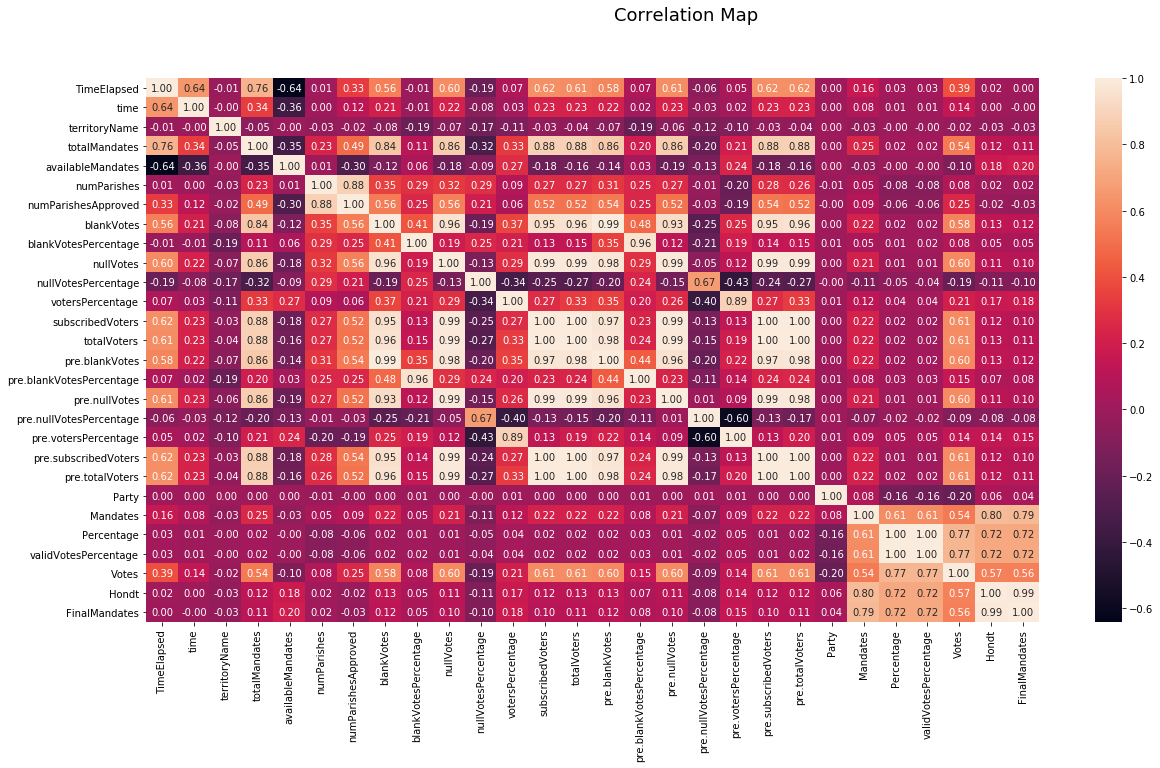

In [82]:
plt.figure(figsize=(20,10)) 
sns.heatmap(election_data.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

In [83]:
# Setting x  by excluding Total Deaths column which is y here for prediction.
x=election_data.drop(['FinalMandates'],axis=1)
x

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt
22,0,30.636258,0,0.000000,2.833213,147,12,5.231109,2.92,4.624973,...,0.966984,54.56,9.434443,8.828641,17,0.0,3.564732,3.609566,7.690743,2.079442
23,0,30.636258,0,0.000000,2.833213,147,12,5.231109,2.92,4.624973,...,0.966984,54.56,9.434443,8.828641,1,0.0,2.136531,2.177022,6.167516,0.693147
24,0,30.636258,0,0.000000,2.833213,147,12,5.231109,2.92,4.624973,...,0.966984,54.56,9.434443,8.828641,2,0.0,1.965713,2.005526,5.971262,0.693147
25,0,30.636258,0,0.000000,2.833213,147,12,5.231109,2.92,4.624973,...,0.966984,54.56,9.434443,8.828641,11,0.0,1.220830,1.252763,5.030438,0.000000
26,0,30.636258,0,0.000000,2.833213,147,12,5.231109,2.92,4.624973,...,0.966984,54.56,9.434443,8.828641,10,0.0,1.111858,1.144223,4.875197,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,30.636258,19,2.197225,0.000000,277,277,8.516393,2.81,8.216358,...,1.064711,51.28,12.826466,12.158525,9,0.0,0.173953,0.182322,5.808142,0.000000
21639,265,30.636258,19,2.197225,0.000000,277,277,8.516393,2.81,8.216358,...,1.064711,51.28,12.826466,12.158525,14,0.0,0.165514,0.173953,5.789960,0.000000
21640,265,30.636258,19,2.197225,0.000000,277,277,8.516393,2.81,8.216358,...,1.064711,51.28,12.826466,12.158525,8,0.0,0.131028,0.139762,5.549076,0.000000
21641,265,30.636258,19,2.197225,0.000000,277,277,8.516393,2.81,8.216358,...,1.064711,51.28,12.826466,12.158525,18,0.0,0.122218,0.131028,5.480639,0.000000


In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scale = StandardScaler()
#scale = MinMaxScaler()
x=scale.fit_transform(x)

In [85]:
# Settng Y
y=election_data['FinalMandates']
y

22       2.079442
23       1.098612
24       0.693147
25       0.000000
26       0.000000
           ...   
21638    0.000000
21639    0.000000
21640    0.000000
21641    0.000000
21642    0.000000
Name: FinalMandates, Length: 18333, dtype: float64

In [86]:

max_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lm=LinearRegression()
    lm.fit(train_x,train_y)
    pred=lm.predict(test_x)
    score=lm.score(x,y)
    #print("Score corresponding to r_state: ",r_state," is ",score)
    if(score>max_score):
        max_score=score
        final_rstate=r_state
        
print("\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_score)



Max_accuracy_Score corresponding to final_r_state:  95  is  0.978910738546972


In [87]:
# Setting the test x & y values and using the random state from above step.

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=74)

In [88]:
train_x.shape

(13749, 27)

In [89]:
train_y.shape

(13749,)

In [90]:
test_x.shape

(4584, 27)

In [91]:
test_y.shape

(4584,)

In [92]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [93]:
KNN=KNeighborsRegressor(n_neighbors=10)
SV=SVR()
LR=LinearRegression()
DT=DecisionTreeRegressor(random_state=10)
LS = Lasso(alpha=0.01)
RD = Ridge(alpha=0.01)
EL = ElasticNet(alpha=0.01)
RF = RandomForestRegressor(n_estimators=100,random_state=10)
AD = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [94]:
models=[]
models.append(('KNeighborsRegressor',KNN))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DT))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EL))
models.append(('RandomForestRegressor',RF))
models.append(('AdaBoostRegressor',AD))
models.append(('GradientBoostingRegressor',GB))

In [95]:
Model=[]
score=[]
cvs=[]
mae=[]
mse=[]
rmae=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    # Metrics
    m1=mean_absolute_error(test_y,pred)
    print("Mean absolute error",m1)
    mae.append(m1)
           
    m2=mean_squared_error(test_y,pred)
    print("Mean squared error",m2)
    mse.append(m2)
    
    
    m3=np.sqrt(mean_squared_error(test_y,pred))
    print("Root Mean absolute error",m3)
    rmae.append(m3)
    
    #Model performance
    modelscore=model.score(test_x,test_y)
    print("Score: ",modelscore )
    score.append(modelscore*100)
    print("\n")

-------------- KNeighborsRegressor --------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
Mean absolute error 0.258417382528715
Mean squared error 0.35665516017290927
Root Mean absolute error 0.5972061287134529
Score:  0.987818722449647


-------------- SVR --------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Mean absolute error 0.258417382528715
Mean squared error 0.35665516017290927
Root Mean absolute error 0.5972061287134529
Score:  0.9745509209044131


-------------- LinearRegression --------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean absolute error 0.258417382528715
Mean squared error 0.35665516017290927
Root Mean absolute error 0.5972061287134529
Score:  0.9787929163630769


------

In [96]:
result=pd.DataFrame({"Model": Model, "Score": score})
result

,Model,Score
0,KNeighborsRegressor,98.781872
1,SVR,97.455092
2,LinearRegression,97.879292
3,DecisionTreeRegressor,99.932326
4,Lasso,97.705483
5,Ridge,97.879667
6,ElasticNet,97.769016
7,RandomForestRegressor,99.936919
8,AdaBoostRegressor,98.023048
9,GradientBoostingRegressor,99.244074


# RandomForestRegressor seems to be the best model with over 99% accuracy.

In [97]:
# Saving the prediction data in a file.

predictData=pd.DataFrame(pre)
election_data.to_csv('electionMandate_Predict.csv')
predictData

,0
0,-0.000792
1,-0.000842
2,0.000326
3,0.000621
4,-0.004750
...,...
4579,-0.000884
4580,0.007824
4581,-0.005360
4582,2.766765


In [98]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(RF,"RF_ElectionMandate.pkl")

['RF_ElectionMandate.pkl']